# MACS 30150 - Problem Set 3
### by Daniel Tracht, January 2019
The code in this Jupyter notebook was written using Python 3.7.  This problem set follows exercises 5.1 through 5.22 in Dr. Evan's chapter on Dynamic Programming

## Exercise 5.1

Our problem, in terms of consumption is
$$
\max_{c_{t}\in\left[0,W_{t}\right]}\sum_{t=1}^{T}\beta^{t-1}u\left(c_{t}\right)\quad\text{s.t.}\;W_{t+1}=W_{t}-c_{t}
$$

where $W_{t}$ is non-negative and taken as given by the agent in
period $t$. If $T=1$, our problem becomes
$$
\max_{c_{1}\in\left[0,W_{1}\right]}u\left(c_{1}\right)\quad\text{s.t.}\;W_{2}=W_{1}-c_{1}
$$

At the optimum, 
\begin{align*}
W_{1} & =c_{1}\\
W_{2} & =0
\end{align*}

as $u\left(c_{1}\right)$ is increasing in its argument. Written in
the equivalent way, our problem is

$$
\max_{W_{t+1}\in\left[0,W_{t}\right]}\sum_{t=1}^{T}\beta^{t-1}u\left(W_{t}-W_{t+1}\right)
$$

In the case that $T=1$, our problem becomes
$$
\max_{W_{2}\in\left[0,W_{1}\right]}u\left(W_{1}-W_{2}\right)
$$

At the optimum, 
$$
W_{2}=0
$$

as utility is increasing in $W_{1}$ and decreasing in $W_{2}$. This
can be written as 
$$
W_{T+1}=\Psi_{T}\left(W_{T}\right)=0
$$

We wish to find the condition that characterizes the optimal amount of cake to eat in period 1, if the individual lives for one period $T=1$.  The individual would choose $W_1$ such that 


$$\max\limits_{w_2\in [0,W_1]} u(W_1-W_2)$$

## Exercise 5.2

In the case that the agent lives for two periods, that is $T=2$,
our problem in period 2 becomes
$$\max_{W_{3}\in\left[0,W_{2}\right]}u\left(W_{2}-W_{3}\right)
$$
 and we find that
$$
W_{3}=0
$$

In period 1, our problem becomes
$$
\max_{W_{2}\in\left[0,W_{1}\right]}u\left(W_{1}-W_{2}\right)+\beta u\left(W_{2}\right)
$$

subject to our law of motion. At the optimum, we have
$$
\frac{\delta u\left(W_{1}-W_{2}\right)}{\delta W_{2}}=\beta\frac{\delta u\left(W_{2}\right)}{\delta W_{2}}
$$

where the agent chooses $W_{2}$ such that marginal utility today
equals the discounted marginal utility in the next period. This can
be written as
$$
W_{T}=\Psi_{T-1}=\left(W_{T-1}\right):\frac{\delta u\left(W_{T-1}-W_{T}\right)}{\delta W_{T}}=\beta\frac{\delta V_{T}\left(W_{T}\right)}{\delta W_{T}}
$$
 where we've replaced the utility next period with the value function
next period

## Exercise 5.3

In the case that the age lives for three periods, that is $T=3$,
our problem becomes easier to write using the policy functions from
the previous two exercises and the notation used in the lectures:
$$
\max_{W_{T-1}}u\left(W_{T-2}-W_{T-1}\right)+\beta u\left(W_{T-1}-\Psi_{T-1}\left(W_{T-1}\right)\right)+\beta^{2}u\left(\Psi_{T-1}\left(W_{T-1}\right)\right)
$$

where $W_{T-2}$ is given. Taking a derivative with respect to $W_{T-1}$,
we get
$$
\frac{\delta u\left(W_{T-2}-W_{T-1}\right)}{\delta W_{T-1}}=\beta\frac{\delta u\left(W_{T-1}-W_{T}\right)}{\delta W_{T-1}}
$$

For $T=3$ we get
\begin{align*}
\frac{\delta u\left(W_{1}-W_{2}\right)}{\delta W_{2}} & =\beta\frac{\delta u\left(W_{2}-W_{3}\right)}{\delta W_{2}}=\beta\frac{\delta V_{T}\left(W_{T}\right)}{\delta W_{T}}
\end{align*}

Combining our information, we have
\begin{align*}
\left\{ W_{2},W_{3},W_{4}\right\}  & =\left\{ \right\} \\
W_{4} & =0\\
W_{3} & =\Psi_{2}\left(W_{2}\right)\\
W_{2} & =
\end{align*}

Assuming that $W_{1}=1$, $\beta=0.9$, and that the period utility
function is $\ln\left(c_{t}\right)$, we wish to find the vectors
of consumption and cake size over our time periods. We can solve this and practice our Python at the same time:

In [6]:
# Solving the functions analytically using sympy
import sympy as sy
# Given parameters
w_1 = 1.0
beta = 0.9
# Want to solve for w_2 through w_4 and c_1 through c_3
w_4 = 0 # by construction of the problem
w_2 = sy.symbols('w_2')
w_3 = sy.symbols('w_3')
# a system of our two equations from above
# returns a list of solution mappings
solutions = sy.solve([sy.log(w_2 - w_3).diff(w_3) + beta*sy.log(w_3).diff(w_3),
                      sy.log(w_1 - w_2).diff(w_2) + beta*sy.log(w_2 - w_3).diff(w_2)],
                     dict=True)
# Recall the relations between cake size and consumption
c_1 = w_1 - solutions[0][w_2]
c_2 = solutions[0][w_2] - solutions[0][w_3]
c_3 = solutions[0][w_3]

# w_1 defined as given parameter
w_2 = solutions[0][w_2]
w_3 = solutions[0][w_3]
w_4 = 0 # no need to solve for this one

# make dictionaries of the solutions
w_vec = [w_1, w_2, w_3, w_4]
c_vec = [c_1, c_2, c_3]
key_w = ['w_1', 'w_2', 'w_3', 'w_4']
key_c = ['c_1', 'c_2', 'c_3']

dict_w = dict(zip(key_w, w_vec))
dict_c = dict(zip(key_c, c_vec))

print(dict_w)
print(dict_c)


{'w_1': 1.0, 'w_2': 0.630996309963100, 'w_3': 0.298892988929889, 'w_4': 0}
{'c_1': 0.369003690036900, 'c_2': 0.332103321033210, 'c_3': 0.298892988929889}


## Exercise 5.4
We have rewritten our problem as
$$
V_{T-1}\left(W_{T-1}\right)=\max_{W_{T}}u\left(W_{T-1}-W_{T}\right)+\beta V_{T}\left(W_{T}\right)
$$
We want to show the policy function in period $T-1$ for 
$$
W_{T}=\psi_{T-1}\left(W_{T-1}\right)
$$

From the work in excercise 5.2, this is
$$
W_{T}=\psi_{T-1}\left(W_{T-1}\right):\frac{\delta u\left(W_{T-1}-W_{T}\right)}{\delta W_{T}}=\beta\frac{\delta V\left(W_{T}\right)}{\delta W_{T}}
$$

Writing the value function $V_{T-1}$ in terms of the policy function,
we have
$$
V_{T-1}\left(W_{T-1}\right)=\max_{W_{T}}u\left(W_{T-1}-\psi_{T-1}\left(W_{T-1}\right)\right)+\beta V_{T}\left(\psi_{T-1}\left(W_{T-1}\right)\right)
$$

## Exercise 5.5

Let us assume that $u\left(c\right)=\ln\left(c\right)$. We want to
show that
$$
V_{T-1}\left(\bar{W}\right)\neq V_{T}\left(\bar{W}\right)
$$
 and that
$$
\psi_{T-1}\left(\bar{W}\right)\neq\psi_{T}\left(\bar{W}\right)
$$
 for a fixed cake size $\bar{W}$ and $T<\infty$ is the last period
of the agent's life. Since the agent is finitely lived, we know that
$\psi_{T}\left(\bar{W}\right)=W_{T+1}=0$. Intuitively, the agent
can't eat cake after death. Furthermore, we know that
$$
\psi_{T-1}\left(\bar{W}\right)=W_{T}=\bar{W}
$$

Thus, 
$$
\psi_{T-1}\left(\bar{W}\right)\neq\psi_{T}\left(\bar{W}\right)
$$

Futhermore, we know that
\begin{align*}
V_{T}\left(\bar{W}\right) & =\max_{W_{T+1}}u\left(\bar{W}-\psi_{T}\left(\bar{W}\right)\right)+\beta V_{T+1}\left(\psi_{T}\left(\bar{W}\right)\right)\\
 & =\max_{W_{T+1}}u\left(\bar{W}\right)\\
 & =u\left(\bar{W}\right)\\
 & =\ln\left(\bar{W}\right)
\end{align*}

and that
$$
V_{T-1}\left(\bar{W}\right)=\max_{W_{T}}u\left(\bar{W}-\psi_{T-1}\left(W_{T}\right)\right)+\beta V_{T}\left(\psi_{T-1}\left(W_{T}\right)\right)
$$

At optimality with our assumed form for utility, we have
$$
$$

## Exercise 5.6
Assuming that $u\left(c\right)=\ln\left(c\right)$, we want to write
the finite horizon Bellman equation for the value function at time
$T-2$. This is
\begin{align*}
V_{T-2}\left(W_{T-2}\right) & =\max_{W_{T-1}}\ln\left(W_{T-2}-W_{T-1}\right)+\beta V_{T}\left(W_{T-1}\right)\\
\end{align*}
 

which is a very pretty recursive equation. We want the analytical
solution for
$$
W_{T-1}=\psi_{T-2}\left(W_{T-2}\right)
$$

using the envelope theorem. This is
$$
W_{t-1}
$$

Furthermore, we want the analytical solution for $V_{T-2}$. This
is
$$
V_{T-2}
$$

## Exercise 5.7

Assuming that $u\left(c\right)=\ln\left(c\right)$, and with the answers
to the previous two exercises, we want to write down the expressions
for the analytical solutions for
$$
\psi_{T-s}\left(W_{T-s}\right)
$$

and 
$$
V_{T-s}\left(W_{T-s}\right)
$$
 for the general integer $s\geq1$ using induction.

This is
$$
\psi_{T-s}\left(W_{T-s}\right)=\frac{\sum_{i=1}^{s}\beta^{i}}{1+\sum_{i=1}^{s}\beta^{i}}W_{T-s}
$$

which intuitively means that the cake saved for the next $s$ periods
until death is the cake that keeps the discounted stream of log utility
stable. Furthermore, we have
$$
V_{T-s}\left(W_{T-s}\right)=\sum_{i=1}^{s}\beta^{i}\ln\left(\frac{\beta^{i}W_{T-s}}{1+\sum_{i=1}^{s}\beta^{i}}\right)
$$

which intuitively means that the value We want to show that
$$
\lim_{s\to\infty}V_{T-s}\left(W_{T-s}\right)=V\left(W_{T-s}\right)
$$

and that
$$
\lim_{s\to\infty}\psi_{T-s}\left(W_{T-s}\right)=\psi\left(W_{T-s}\right)
$$

## Exercise 5.8
We want to write the Bellman equation for the cake eating problem
with a general utility function with $T=\infty$. This is
$$
V\left(W\right)=\max_{W^{\prime}\in\left[0,W\right]}u\left(W-W^{\prime}\right)+\beta V\left(W^{\prime}\right)
$$


## Exercise 5.9
For this  we can work in Python

In [34]:
import numpy as np
w_min = 1e-2
w_max = 1.0
N = 100
w_vec = np.linspace(w_min, w_max, N)

## Exercise 5.10
Continuing in Python

In [35]:
# defining the utility function
def utility(consumption):
    utils = np.log(consumption)
    return utils
# given parameter
beta = 0.9

# following the code as covered in lecture
w = np.tile(w_vec.reshape((N, 1)), (1, N))
w_prime = np.tile(w_vec.reshape((1, N)), (N, 1))
c_mat = w - w_prime
c_pos = c_mat > 0
c_mat[~c_pos] = 1e-7
u_mat = utility(c_mat)
# initial guess of zeros
v_init = np.zeros(N).reshape((N, 1))
vt_w = u_mat + beta * v_init

# this is the value function
v_vec = vt_w.max(axis=1)

#print(v_vec)

index = np.argmax(vt_w, axis=1)

# this is the policy function
w_prime_opt = w_vec[index]
#print(w_prime_opt)

## Exercise 5.11

Defining the distance metric in Python:

In [36]:
def distance(vf_1, vf_2):
    norm = np.sum((vf_1 - vf_2)**2)
    return norm

## Exercise 5.12
Generating $V_{T-1}$ and $\psi_{T-1}$ in Python:

In [37]:
# taking v_vec from 5.10
v_prime = np.tile(v_vec.reshape((1, N)), (N, 1))
# punish the values for negative consumption
v_prime[~c_pos] = -9e+5
v_w_1 = u_mat + beta * v_prime
# new value function
v_max_1 = v_w_1.max(axis=1)
#print(v_max_1)

index = np.argmax(v_w_1, axis=1)
# new policy function
w_prime_opt = w_vec[index]
#print(w_prime_opt)

# compare the distances
dist_T = distance(v_vec, v_init)
print("Distance at time T:", dist_T)
dist_T_1 = distance(v_max_1, v_vec)
print("Distance at time T-1:", dist_T_1)

Distance at time T: 43871.91180731695
Distance at time T-1: 656100000726.7605


The distance for $T-1$  is much larger than for $T$

## Exercise 5.13
Repeating the takse for $T-2$

In [39]:
# taking v_max_1 from 5.12
v_prime = np.tile(v_max_1.reshape((1, N)), (N, 1))
# punish the values for negative consumption
v_prime[~c_pos] = -9e+5
v_w_2 = u_mat + beta * v_prime
# new value function
v_max_2 = v_w_2.max(axis=1)
#print(v_max_1)

index = np.argmax(v_w_2, axis=1)
# new policy function
w_prime_opt = w_vec[index]
#print(w_prime_opt)

# compare the distances
dist_T = distance(v_vec, v_init)
print("Distance at time T:", dist_T)
dist_T_1 = distance(v_max_1, v_vec)
print("Distance at time T-1:", dist_T_1)
dist_T_2 = distance(v_max_2, v_max_1)
print("Distance at time T-2 compared to T-1:", dist_T_2)
dist_T_2_alt = distance(v_max_2, v_init)
print("Distance at time T-2 compared to T:", dist_T_2_alt)

Distance at time T: 43871.91180731695
Distance at time T-1: 656100000726.7605
Distance at time T-2 compared to T-1: 531441000766.63214
Distance at time T-2 compared to T: 118759498024501.34


Again, the distances at $T-2$ are greater than for time $T$.

## Exercise 5.14
A first exercise of value function iteration in Python:


In [32]:
max_iters = 500
tolerance = 1e-10
dist = 10.0
vf_iter = 0
while dist > tolerance and vf_iter < max_iters:
    vf_iter += 1
    # takes an initial guess and calculates the new value function 
    v_prime = np.tile(v_init.reshape((1, N)), (N, 1))
    v_prime[~c_pos] = -9e+4
    v_new = (u_mat + beta * v_prime).max(axis=1)
    # measures the distance between the new value function and the old
    dist = distance(v_new, v_init)
    print('Iteration =', vf_iter, '; distance =', dist)
    v_init = v_new

print("Convergence!")
print("It takes %d iterations to converge" % vf_iter)

Iteration = 1 ; distance = 656361157021.4574
Iteration = 2 ; distance = 5316525743.271798
Iteration = 3 ; distance = 4306386030.006323
Iteration = 4 ; distance = 3488172794.5714226
Iteration = 5 ; distance = 2825420037.630621
Iteration = 6 ; distance = 2288590282.5590844
Iteration = 7 ; distance = 1853758166.5375955
Iteration = 8 ; distance = 1501544142.7426846
Iteration = 9 ; distance = 1216250776.642259
Iteration = 10 ; distance = 985163145.1419044
Iteration = 11 ; distance = 797982160.0373642
Iteration = 12 ; distance = 646365559.4266962
Iteration = 13 ; distance = 523556110.9935629
Iteration = 14 ; distance = 424080456.20615387
Iteration = 15 ; distance = 343505174.74340343
Iteration = 16 ; distance = 278239195.8852569
Iteration = 17 ; distance = 225373752.31221965
Iteration = 18 ; distance = 182552742.55996224
Iteration = 19 ; distance = 147867724.27005062
Iteration = 20 ; distance = 119772859.10622115
Iteration = 21 ; distance = 97016018.0385953
Iteration = 22 ; distance = 785829

## Exercise 5.15
Plotting in Python

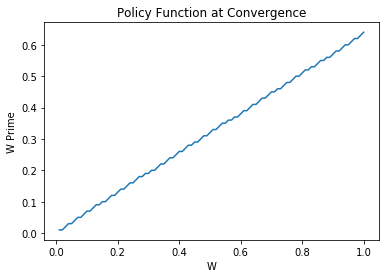

In [42]:
import matplotlib.pyplot as plt

index = np.argmax(u_mat + beta * v_prime, axis=1)
w_prime_opt = w_vec[index]
plt.plot(w_vec, w_prime_opt)
plt.title('Policy Function at Convergence')
plt.xlabel('W')
plt.ylabel("W Prime")
plt.show()


## Exercise 5.16
With i.i.d. stochastic shocks:

In [46]:
import scipy.stats as sts
# parameters from the exercise
sigma = np.sqrt(0.25)
mu = 4 * sigma
e_max = mu + 3 * sigma
e_min = mu - 3 * sigma
M = 7
e_vec = np.linspace(e_min, e_max, M)
Gamma = sts.norm.pdf(e_vec, loc = mu, scale = sigma)

array([0.0088637 , 0.10798193, 0.48394145, 0.79788456, 0.48394145,
       0.10798193, 0.0088637 ])

## Exercise 5.17
Getting the policy function in the stochastic case:

In [59]:
# as from above
w = np.tile(w_vec.reshape((N, 1)), (1, N))
w_prime = np.tile(w_vec.reshape((1, N)), (N, 1))
c_mat = w - w_prime
c_pos = c_mat > 0
c_mat[~c_pos] = 1e-7
u_mat = utility(c_mat)
# adding the shocks
u_prism = np.array([u_mat*e for e in Gamma])

# following from lecture
v_init = np.zeros((N, M))
v_expected = v_init @ Gamma.reshape((M,1))
v_expected_mat = np.tile(v_expected.reshape((1, N)), (N, 1))
v_expected_mat[~c_pos] = -9e+5
v_expected_prism = np.array([v_expected_mat for i in range(M)])

# get the new value
v_t = u_prism + beta * v_expected_prism
# maximizing the axis to conform dimensions
v_new = np.zeros((N, M))
w_prime = np.zeros((N, M))
for i in range(N):
    v_w = v_t[:, i, :]
    v_new[i] = v_w.max(axis=1)
    index = np.argmax(v_w, axis=1)
    w_prime[i] = w_vec[index]

## Exercise 5.18
The norm revisted

In [60]:
def distance(vf_1, vf_2):
    norm = np.sum((vf_1 - vf_2)**2)
    return norm
dist = distance(v_new, v_init)
print("The distance between T and init:", dist)

The distance between T and init: 4592752208991.432


## Exercise 5.19
Contraction revisited

In [61]:
# Replacing v_init with v_new from 5.17
v_init = v_new
v_expected = v_init @ Gamma.reshape((M,1))
v_expected_mat = np.tile(v_expected.reshape((1, N)), (N, 1))
v_expected_mat[~c_pos] = -9e+5
v_expected_prism = np.array([v_expected_mat for i in range(M)])

# get the new value
v_t = u_prism + beta * v_expected_prism
# maximizing the axis to conform dimensions
v_new_1 = np.zeros((N, M))
w_prime_1 = np.zeros((N, M))
for i in range(N):
    v_w = v_t[:, i, :]
    v_new_1[i] = v_w.max(axis=1)
    index = np.argmax(v_w, axis=1)
    w_prime_1[i] = w_vec[index]
    
dist_1 = distance(v_new_1, v_new)
print("The distance between T-1 and T:", dist_1)

The distance between T-1 and T: 4592737294212.839


This distance has gone down slightly.

## Exercise 5.20
Another contraction

In [62]:
# Replacing v_init with v_new_1 from 5.19
v_init = v_new_1
v_expected = v_init @ Gamma.reshape((M,1))
v_expected_mat = np.tile(v_expected.reshape((1, N)), (N, 1))
v_expected_mat[~c_pos] = -9e+5
v_expected_prism = np.array([v_expected_mat for i in range(M)])

# get the new value
v_t = u_prism + beta * v_expected_prism
# maximizing the axis to conform dimensions
v_new_2 = np.zeros((N, M))
w_prime_2 = np.zeros((N, M))
for i in range(N):
    v_w = v_t[:, i, :]
    v_new_2[i] = v_w.max(axis=1)
    index = np.argmax(v_w, axis=1)
    w_prime_2[i] = w_vec[index]
    
dist_2 = distance(v_new_2, v_new_1)
print("The distance between T-2 and T:", dist_2)

The distance between T-2 and T: 4592684263232.5205


The distance again decreases.

## Exercise 5.21
First stochastic value function iteration in Python:

In [63]:
max_iters = 500
tolerance = 1e-10
dist = 10.0
vf_iter = 0
v_init = np.zeros((N, M))
while dist > tolerance and vf_iter < max_iters:
    vf_iter += 1
    # takes an initial guess and calculates the new value function 
    v_expected = v_init @ Gamma.reshape((M,1))
    v_expected_mat = np.tile(v_expected.reshape((1, N)), (N, 1))
    v_expected_mat[~c_pos] = -9e+5
    v_expected_prism = np.array([v_expected_mat for i in range(M)])
    # get the new value
    v_t = u_prism + beta * v_expected_prism
    # maximizing the axis to conform dimensions
    v_new = np.zeros((N, M))
    w_prime = np.zeros((N, M))
    for i in range(N):
        v_w = v_t[:, i, :]
        v_new[i] = v_w.max(axis=1)
        index = np.argmax(v_w, axis=1)
        w_prime[i] = w_vec[index]
    dist = distance(v_new, v_init)
    print('Iteration =', vf_iter, '; distance =', dist)
    v_init = v_new

print("Convergence!")
print("It takes %d iterations to converge" % vf_iter)

Iteration = 1 ; distance = 4592752208991.432
Iteration = 2 ; distance = 4592737294212.839
Iteration = 3 ; distance = 4592684263232.5205
Iteration = 4 ; distance = 4592588847470.437
Iteration = 5 ; distance = 4592417191307.818
Iteration = 6 ; distance = 4592108440110.062
Iteration = 7 ; distance = 4591553307590.937
Iteration = 8 ; distance = 4590555850423.502
Iteration = 9 ; distance = 4588765787437.956
Iteration = 10 ; distance = 4585560273089.171
Iteration = 11 ; distance = 4579842631902.5625
Iteration = 12 ; distance = 4569717238903.769
Iteration = 13 ; distance = 4552023936574.209
Iteration = 14 ; distance = 4521885388643.65
Iteration = 15 ; distance = 4473134221758.366
Iteration = 16 ; distance = 4403084113955.9795
Iteration = 17 ; distance = 4334015761996.3564
Iteration = 18 ; distance = 4393416684102.841
Iteration = 19 ; distance = 5092352109964.73
Iteration = 20 ; distance = 8258104678352.478
Iteration = 21 ; distance = 20103392134173.99
Iteration = 22 ; distance = 4238213798279

## Exercise 5.22
3-D Plotting in Python:


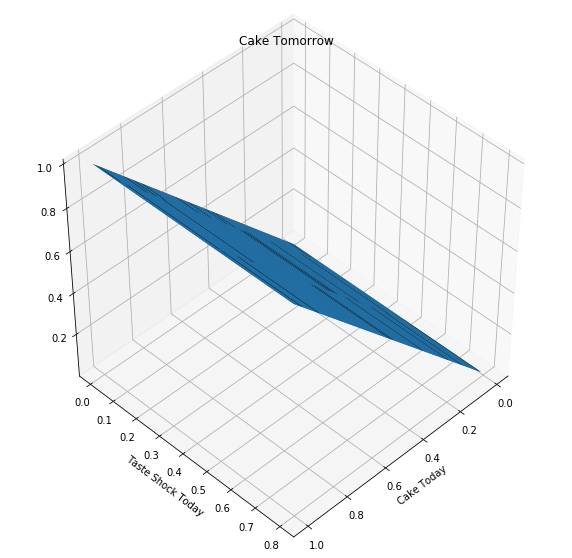

In [66]:
from mpl_toolkits.mplot3d import Axes3D
x,y = np.meshgrid(w_vec, Gamma)
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x.T, y.T, w_prime)
ax.set_xlabel('Cake Today')
ax.set_ylabel('Taste Shock Today')
ax.set_title("Cake Tomorrow")
ax.view_init(elev = 45, azim = 45)
plt.show()
